In [1]:
!pip install autogen

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.3/497.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.2/314.2 kB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 36.0 MB/s eta 0:00:00


In [2]:
!pip install dask[dataframe]


INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 4.4 MB/s eta 0:00:00


In [3]:
import os
os.environ["OPENAI_API_KEY"] = "..." # Replace YOUR_API_KEY with your actual API key

In [4]:
#importing the libraries , configuration of which model we are using
from IPython.display import display , Image

import autogen
from autogen.coding import LocalCommandLineCodeExecutor
config_list = autogen.config_list_from_json(
    "OAI_CONFIG_LIST.json",
    filter_dict={"tags":["gpt-4o"]}
)

In [5]:
#Example 1 - Checking the stock price change
#first we will create the assiastant agent
assistant = autogen.AssistantAgent(
    name="assistant",
    llm_config={
        "cache_seed":41,
        "config_list": config_list,
        "temperature": 0,
        "model": "gpt-4o"
    }
)

#creating the userProxy agent
user_proxy = autogen.UserProxyAgent(
    name="user_proxy",
    human_input_mode="NEVER",
    max_consecutive_auto_reply=10,
    is_termination_msg=lambda x: x.get("content", "").rstrip().endswith("TERMINATE"),
    code_execution_config={
        "executor" : LocalCommandLineCodeExecutor(work_dir="coding"),
    }
)

chat_res = user_proxy.initiate_chat(
    assistant,
    message="""What date is today? Compare the year-to-date gain for META and TESLA.""",
    summary_method= "reflection_with_llm"
)

user_proxy (to assistant):

What date is today? Compare the year-to-date gain for META and TESLA.

--------------------------------------------------------------------------------
assistant (to user_proxy):

To compare the year-to-date gain for META (Meta Platforms, Inc.) and TESLA (Tesla, Inc.), we need to follow these steps:

1. **Get the current date**: We'll use Python to get today's date.
2. **Fetch stock data**: We'll retrieve the stock prices for META and TESLA from the beginning of the year to today.
3. **Calculate year-to-date gain**: We'll calculate the percentage gain for each stock from the start of the year to today.

Let's start by getting the current date and then proceed to fetch the stock data.

```python
from datetime import datetime

# Get today's date
today = datetime.now().date()
print(f"Today's date is: {today}")
```

Please execute the code above to get today's date. Once we have the date, we'll proceed to fetch the stock data.

----------------------------------

In [9]:
print("Chat History : " , chat_res.chat_history)

print("Summary : ", chat_res.summary)
print("Cost Info : ", chat_res.cost)

Chat History :  [{'content': 'What date is today? Compare the year-to-date gain for META and TESLA.', 'role': 'assistant', 'name': 'user_proxy'}, {'content': 'To compare the year-to-date gain for META (Meta Platforms, Inc.) and TESLA (Tesla, Inc.), we need to follow these steps:\n\n1. **Get the current date**: We\'ll use Python to get today\'s date.\n2. **Fetch stock data**: We\'ll retrieve the stock prices for META and TESLA from the beginning of the year to today.\n3. **Calculate year-to-date gain**: We\'ll calculate the percentage gain for each stock from the start of the year to today.\n\nLet\'s start by getting the current date and then proceed to fetch the stock data.\n\n```python\nfrom datetime import datetime\n\n# Get today\'s date\ntoday = datetime.now().date()\nprint(f"Today\'s date is: {today}")\n```\n\nPlease execute the code above to get today\'s date. Once we have the date, we\'ll proceed to fetch the stock data.', 'role': 'user', 'name': 'assistant'}, {'content': "exitco

In [10]:
#Example  - Plot chart
#plotting for the last question
user_proxy.send(
    recipient = assistant,
    message="""Plot a chart of their stock price change YTD. Save the data to stock_price_ytd.csv, and save the plot to stock_price_ytd.png.""",

)

user_proxy (to assistant):

Plot a chart of their stock price change YTD. Save the data to stock_price_ytd.csv, and save the plot to stock_price_ytd.png.

--------------------------------------------------------------------------------
assistant (to user_proxy):

To plot a chart of the stock price changes year-to-date (YTD) for META and TESLA, and save the data to a CSV file and the plot to a PNG file, we can follow these steps:

1. **Fetch the stock data**: We already have the stock data from the previous step.
2. **Save the data to a CSV file**: We'll save the relevant stock price data to `stock_price_ytd.csv`.
3. **Plot the stock price changes**: We'll create a line plot showing the stock price changes for both META and TESLA.
4. **Save the plot to a PNG file**: We'll save the plot as `stock_price_ytd.png`.

Let's implement this in the code:

```python
# filename: stock_price_ytd.py

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datet

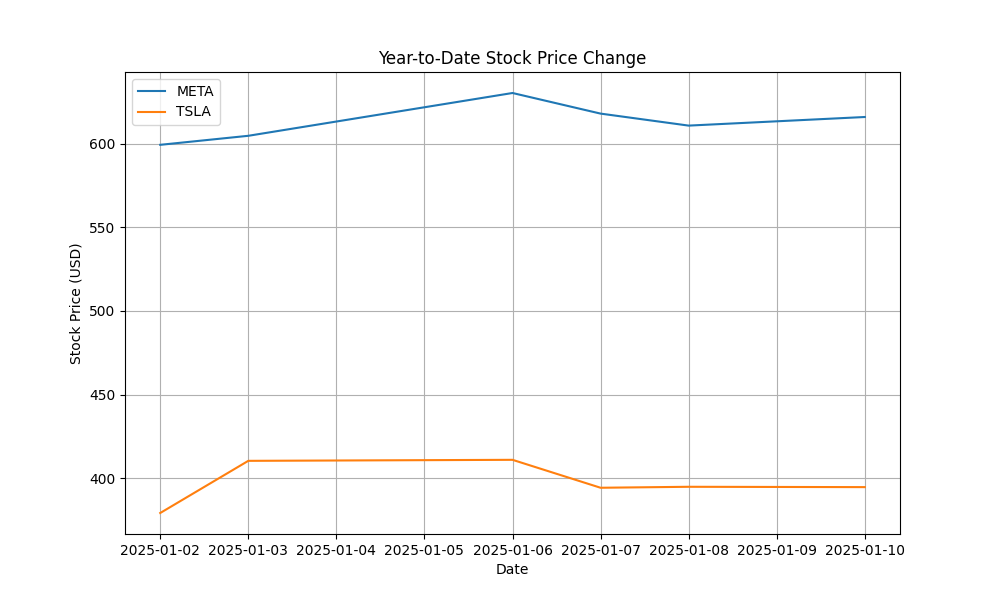

In [11]:
#lets display the generated figure
try:
  image = Image(filename="coding/stock_price_ytd.png")
  display(image)
except FileNotFoundError:
  print("Image is not found. Please check the file name and modify the necessary.")


In [13]:
#Displaying the raw data collected and saved from the previous chat
file_path = "coding/stock_price_ytd.csv"
try:
    with open(file_path,mode="r",encoding="utf-8") as file:
      #read each line in the path
      for line in file:
        #splitting the line into list using comma and separator
        row = line.strip().split(",")
        #printing the row
        print(row)

except FileNotFoundError:
  print("File not found . Please check the file name and modify accordingly")

['Date', 'META', 'TSLA']
['2025-01-02', '599.239990234375', '379.2799987792969']
['2025-01-03', '604.6300048828125', '410.44000244140625']
['2025-01-06', '630.2000122070312', '411.04998779296875']
['2025-01-07', '617.8900146484375', '394.3599853515625']
['2025-01-08', '610.719970703125', '394.94000244140625']
['2025-01-10', '615.8599853515625', '394.739990234375']


In [16]:
#Example 2 - Use User defined message function to let analyze data collected
#this example demonstrates creating a custom message generator function taht read a raw data from a file and format a message for the agents to analyze the data and draft a blog post
def my_message_generator(sender , recipient , context):
  #giving the path of my csv file
  file_name = "coding/stock_price_ytd.csv"
  try:
      with open(file_name , mode="r" , encoding="utf-8") as file :
        file_content = file.read()
  except:
      file_content = "File Not Found",
  return "Analyze the data and write the brief but engaing blog post. \n Data : \n " +file_content

#following the previous question
chat_res = user_proxy.initiate_chat(
    recipient = assistant,
    message = my_message_generator,
    file_name = "coding/stock_price_ytd.csv",
    summary_method = "reflection_with_llm",
    summary_args = {"Summary Prompt" : "Return the blog post in markdown format."},

)

user_proxy (to assistant):

Analyze the data and write the brief but engaing blog post. 
 Data : 
 Date,META,TSLA
2025-01-02,599.239990234375,379.2799987792969
2025-01-03,604.6300048828125,410.44000244140625
2025-01-06,630.2000122070312,411.04998779296875
2025-01-07,617.8900146484375,394.3599853515625
2025-01-08,610.719970703125,394.94000244140625
2025-01-10,615.8599853515625,394.739990234375


--------------------------------------------------------------------------------
assistant (to user_proxy):

To analyze the data and write an engaging blog post, let's first examine the trends and key points in the data provided. The data includes stock prices for META and TSLA over a few days in January 2025. Here's a step-by-step plan:

1. **Data Analysis**: Identify trends, peaks, and any significant changes in the stock prices for both META and TSLA.

2. **Blog Post Writing**: Use the analysis to craft a brief and engaging blog post.

### Step 1: Data Analysis

- **META Stock Analysis**:
  -

In [18]:
print(chat_res.summary)

The blog post analyzes the stock price trends of META and TSLA in early January 2025, highlighting significant fluctuations. META's stock peaked at $630.20 before stabilizing around $615.86, indicating cautious investor optimism. TSLA's stock saw a dramatic rise to $410.44, followed by a stabilization around $394.74, reflecting market recalibration. The post emphasizes the volatile nature of stock investments and the importance of staying informed and adaptable.


In [19]:
#Finally we are giving a comperative analysis of META and TESLA stocks in early 2024
print(chat_res.cost)

{'usage_including_cached_inference': {'total_cost': 0.0553325, 'gpt-4o-2024-08-06': {'cost': 0.0553325, 'prompt_tokens': 13285, 'completion_tokens': 2212, 'total_tokens': 15497}}, 'usage_excluding_cached_inference': {'total_cost': 0.0553325, 'gpt-4o-2024-08-06': {'cost': 0.0553325, 'prompt_tokens': 13285, 'completion_tokens': 2212, 'total_tokens': 15497}}}
